<a href="https://colab.research.google.com/github/FARTASH-421/AI2/blob/master/ProjectCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
# load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# Convert class vectors to binary class matrices.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype(float) / 255
x_test = x_test.astype(float) / 255

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

# Train Model

In [5]:
# define model with pooling
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu'))
model.add(keras.layers.AvgPool2D())
model.add(keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(keras.layers.AvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=120, activation='relu'))
model.add(keras.layers.Dense(units=84, activation='relu'))
model.add(keras.layers.Dense(units=num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [7]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=10,
                    validation_data=(x_test, y_test),
                    shuffle=True)

Epoch 1/10
600/600 [==============================] - 4s 5ms/step - loss: 0.0240 - accuracy: 0.9921 - val_loss: 0.0347 - val_accuracy: 0.9885
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0211 - accuracy: 0.9935 - val_loss: 0.0390 - val_accuracy: 0.9873
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.0351 - val_accuracy: 0.9886
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0170 - accuracy: 0.9945 - val_loss: 0.0382 - val_accuracy: 0.9887
Epoch 5/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.0382 - val_accuracy: 0.9885
Epoch 6/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0130 - accuracy: 0.9957 - val_loss: 0.0479 - val_accuracy: 0.9863
Epoch 7/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0139 - accuracy: 0.9953 - val_loss: 0.0453 - val_accuracy: 0.9879
Epoch 

313/313 [==============================] - 1s 2ms/step
[[ 970    0    2    0    2    0    1    1    2    2]
 [   0 1128    0    3    0    0    1    2    1    0]
 [   0    1 1019    5    1    0    0    4    2    0]
 [   0    0    0 1004    0    3    0    0    3    0]
 [   0    0    1    0  968    0    5    2    0    6]
 [   0    0    1    8    0  881    2    0    0    0]
 [   2    3    0    1    2    4  943    0    3    0]
 [   0    2    6    1    0    0    0 1015    1    3]
 [   1    0    2    4    1    1    0    1  962    2]
 [   0    0    0    5    7    5    0    2    0  990]]
[[0.99  0.    0.002 0.    0.002 0.    0.001 0.001 0.002 0.002]
 [0.    0.994 0.    0.003 0.    0.    0.001 0.002 0.001 0.   ]
 [0.    0.001 0.987 0.005 0.001 0.    0.    0.004 0.002 0.   ]
 [0.    0.    0.    0.994 0.    0.003 0.    0.    0.003 0.   ]
 [0.    0.    0.001 0.    0.986 0.    0.005 0.002 0.    0.006]
 [0.    0.    0.001 0.009 0.    0.988 0.002 0.    0.    0.   ]
 [0.002 0.003 0.    0.001 0.002 0.00

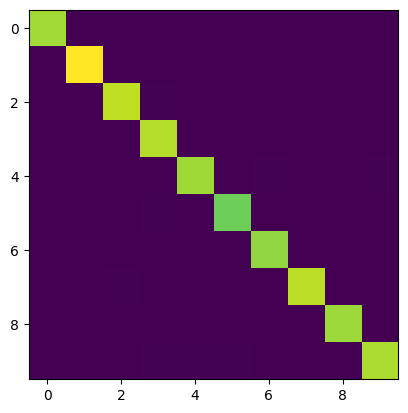

In [8]:
# plot confusion matrix
import sklearn.metrics

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize=None)

plt.imshow(conf)
print(conf)

conf_norm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='true')
print(np.round(conf_norm, 3))


In [9]:
w, b = model.layers[0].get_weights()
b.shape, w.shape

((6,), (5, 5, 1, 6))

In [12]:
# w = np.random.randn(11, 11, 3)
# plt.figure(figsize=(2,2))
# plt.imshow((w - w.min()) / (w.max() - w.min()))

313/313 [==============================] - 1s 2ms/step
3 => 8
[0.    0.    0.    0.059 0.    0.001 0.    0.    0.94  0.   ]


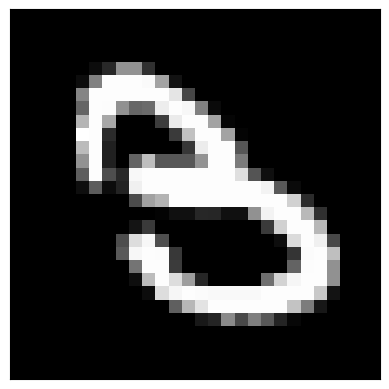

4 => 9
[0.    0.    0.    0.    0.109 0.    0.    0.    0.    0.891]


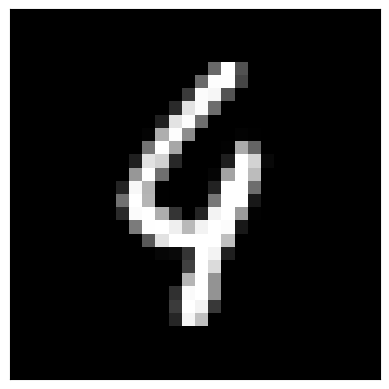

4 => 6
[0.    0.    0.005 0.    0.001 0.    0.994 0.    0.    0.   ]


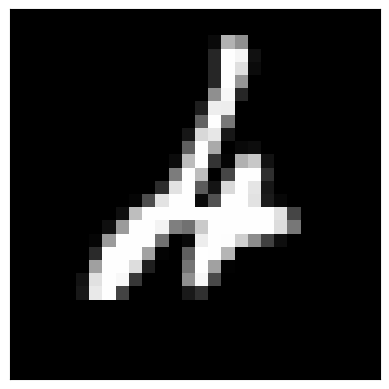

5 => 3
[0.    0.    0.    0.895 0.    0.105 0.    0.    0.    0.   ]


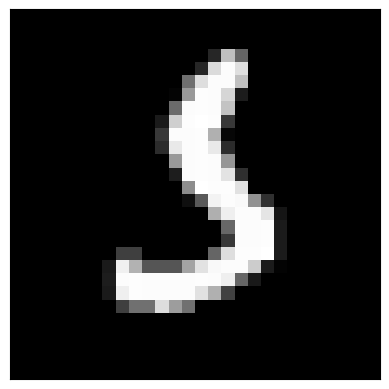

6 => 0
[0.864 0.    0.    0.    0.    0.    0.136 0.    0.    0.   ]


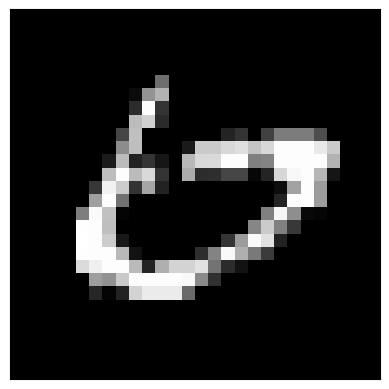

3 => 5
[0.    0.    0.    0.047 0.    0.953 0.    0.    0.    0.   ]


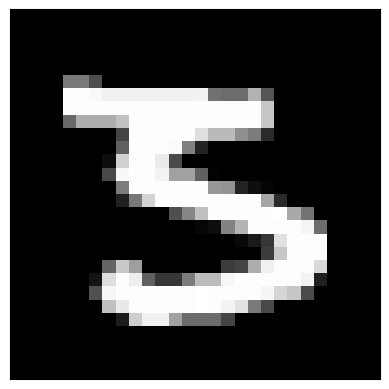

0 => 4
[0.229 0.    0.    0.    0.771 0.    0.    0.    0.    0.   ]


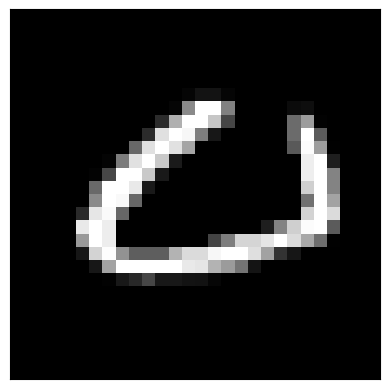

2 => 3
[0.    0.    0.132 0.863 0.    0.    0.    0.    0.005 0.   ]


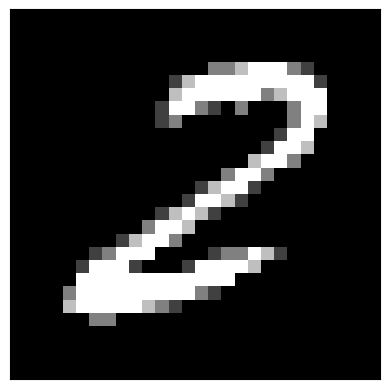

In [13]:
# show errors
y_pred = model.predict(x_test)

idx = np.where(np.argmax(y_pred, axis=1) != np.argmax(y_test, axis=1))[0]

for i in idx[:8]:
  print('{} => {}'.format(np.argmax(y_test[i]), np.argmax(y_pred[i])))
  print(np.round(y_pred[i], 3))
  plt.figure()
  plt.imshow(x_test[i][..., 0], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [14]:
# serialize model to JSON
model_json = model.to_json()
with open("mnist_classifier.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("mnist_classifier.h5")
print("Saved model to disk")

Saved model to disk


#Project CV



In [130]:
# load json and create model
json_file = open('mnist_classifier.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("mnist_classifier.h5")
print("Loaded model from disk")

Loaded model from disk


In [18]:
def showImage(image):
  plt.imshow(image, cmap='gray')
  plt.show()

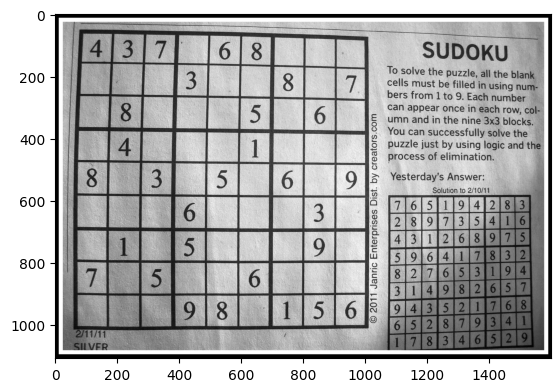

In [19]:
path = "/content/sudoku1.jpg"
myImg = cv2.imread(path)
g_myImg = cv2.cvtColor(myImg, cv2.COLOR_RGB2GRAY)
showImage(g_myImg)

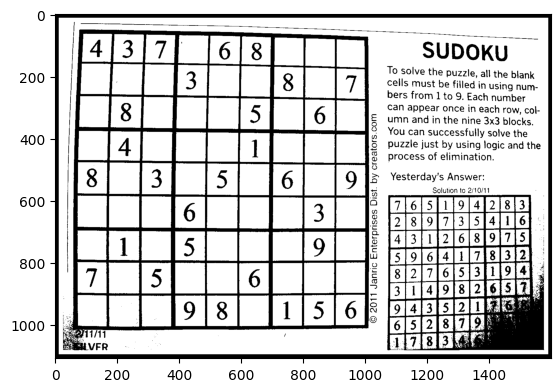

In [20]:
ret, g_myImg = cv2.threshold(g_myImg, 100, 255, cv2.THRESH_BINARY)
showImage(g_myImg)

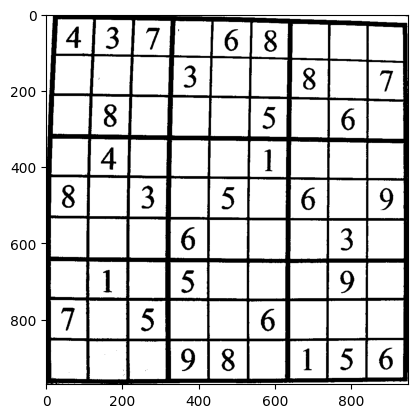

True

In [21]:
New_img = g_myImg[50:1020, 60:1010]
showImage(New_img)

# Save the cropped image
cv2.imwrite("Cropped Image.jpg", New_img)

#Crop Row Image

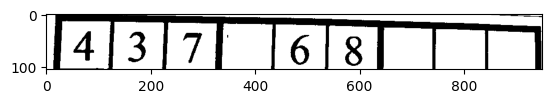

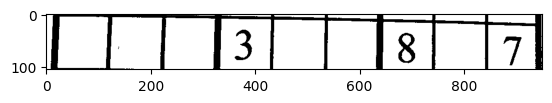

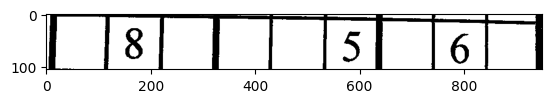

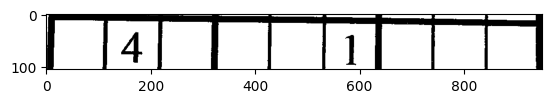

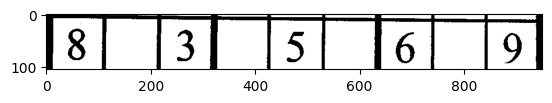

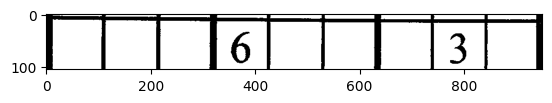

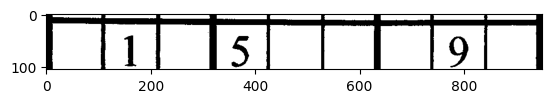

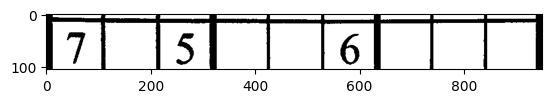

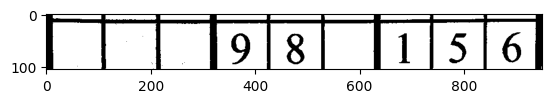

In [105]:
dx , dy = New_img.shape
jumpX = 105
img_lisRow = []
for i in range(0, dx-100, jumpX):
  Newimg = New_img[i:jumpX+i, 0:dy]
  showImage(Newimg)
  print()
  img_lisRow.append(Newimg)

#Crop Col Image


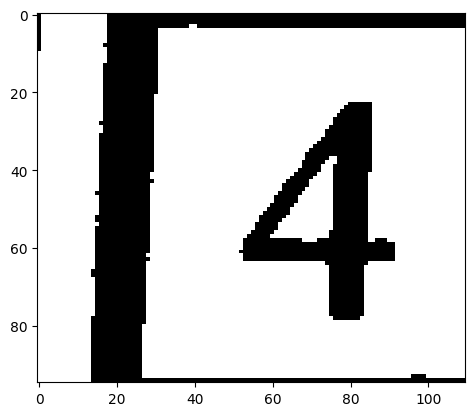

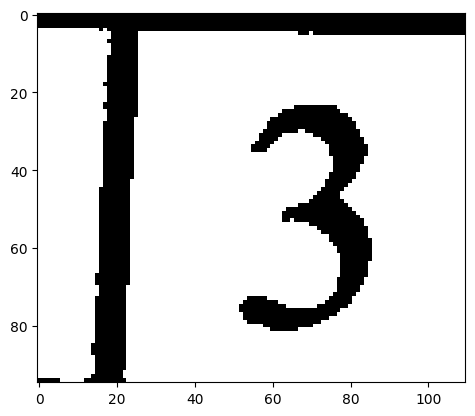

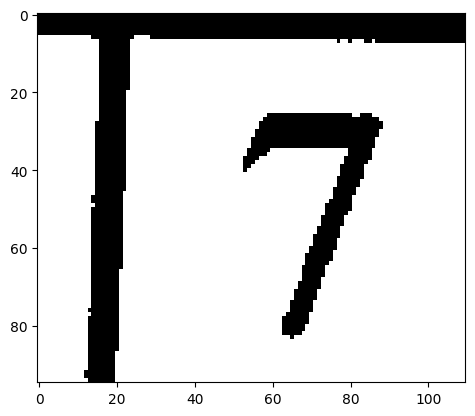

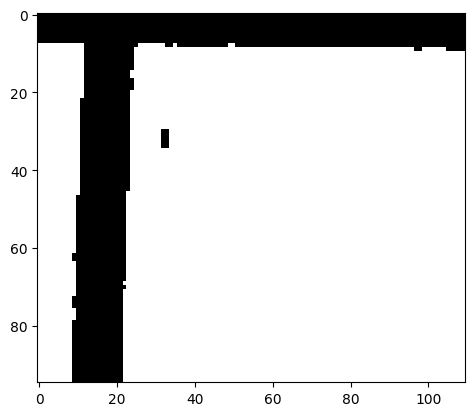

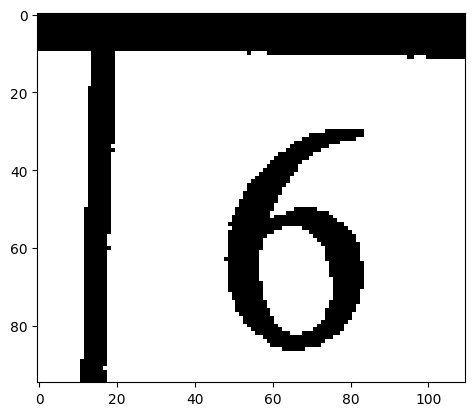

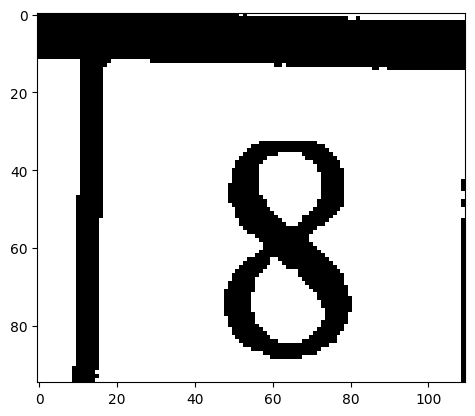

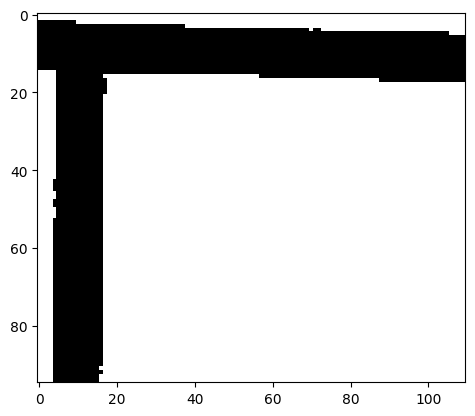

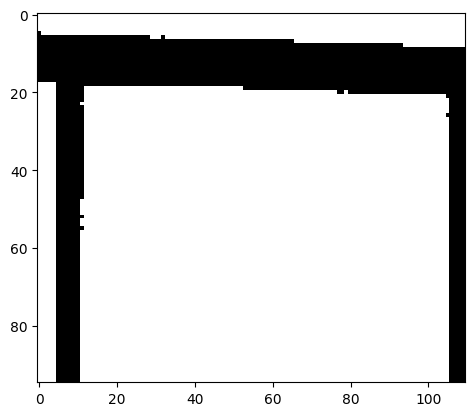

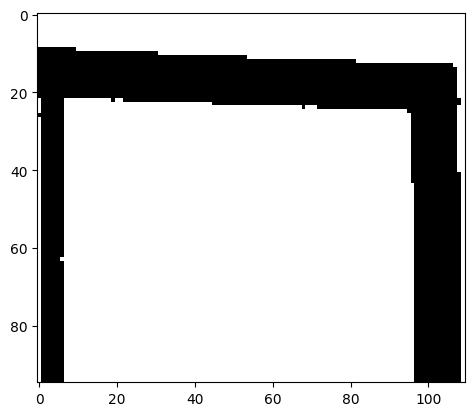

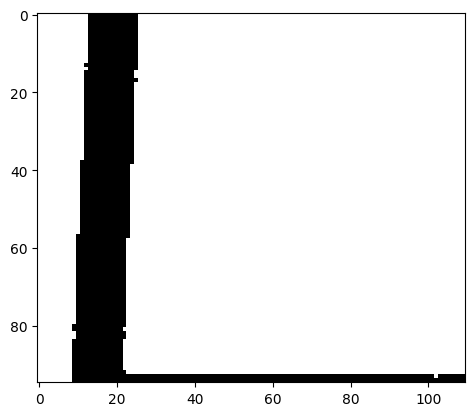

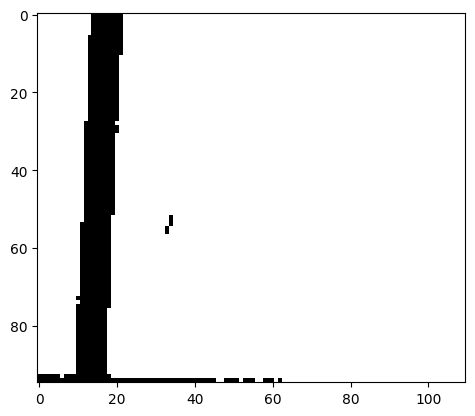

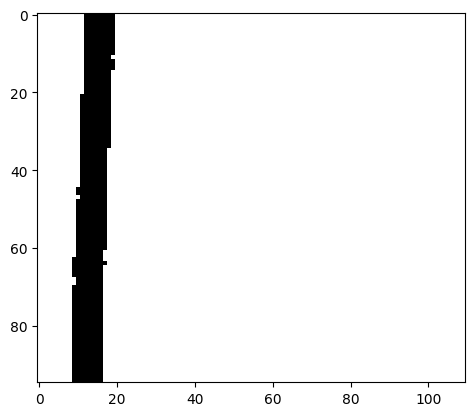

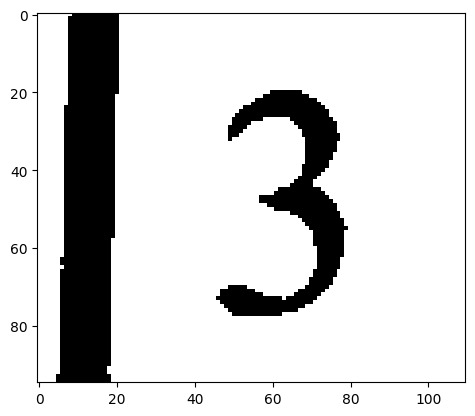

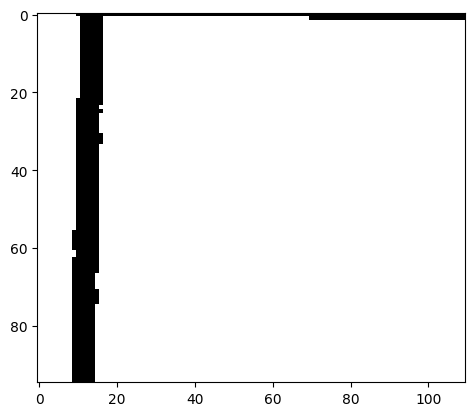

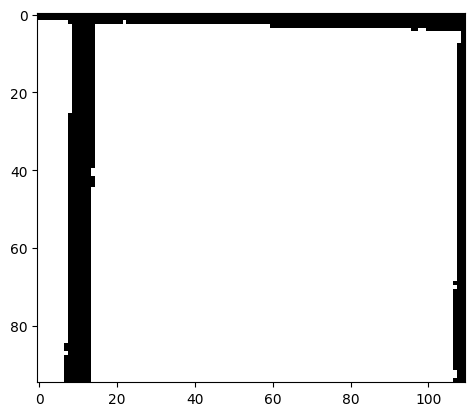

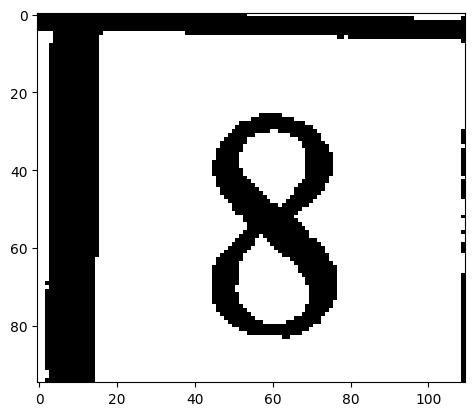

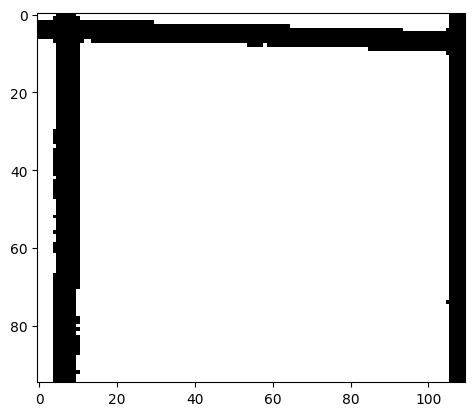

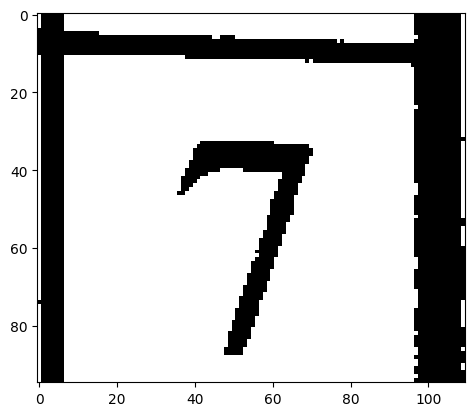

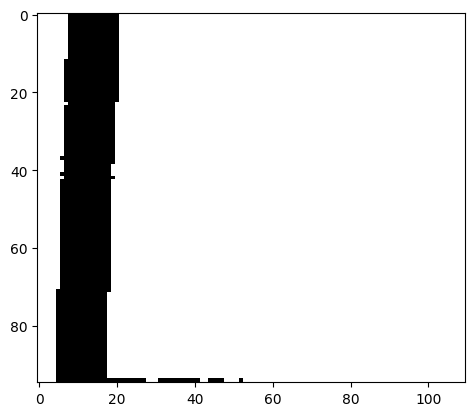

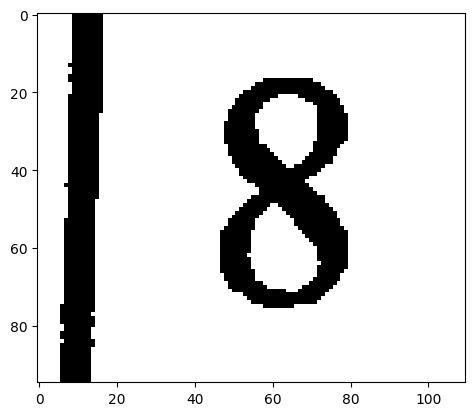

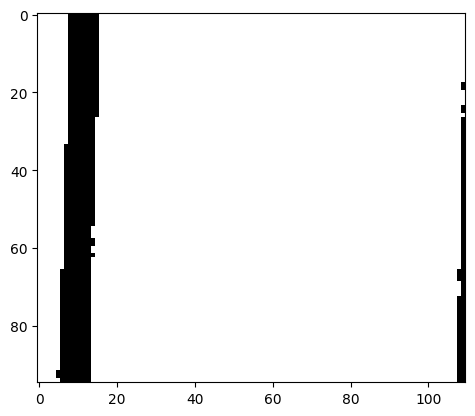

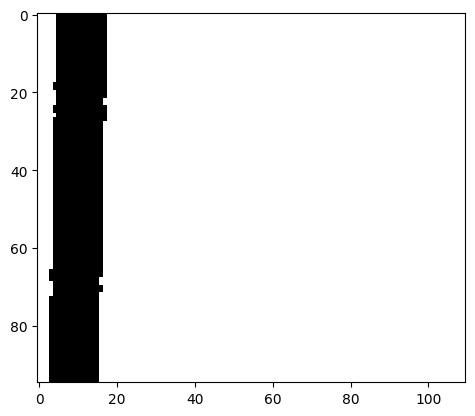

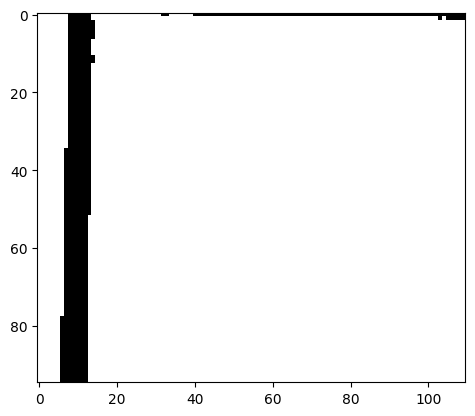

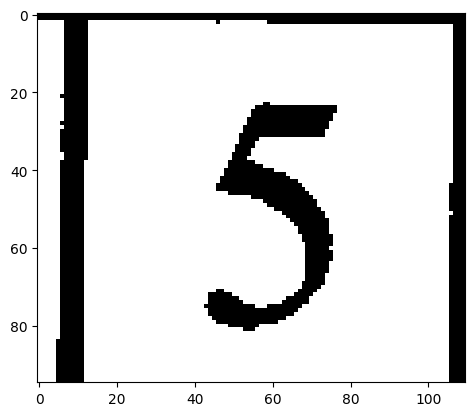

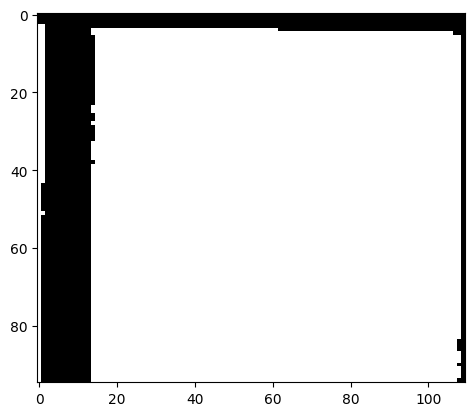

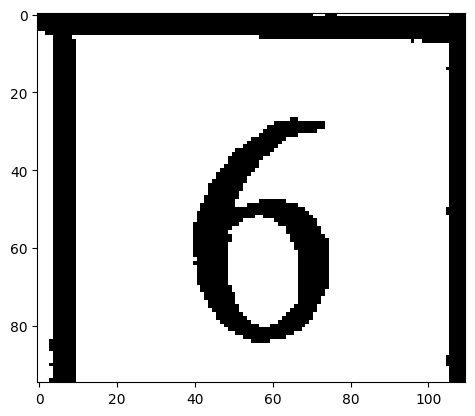

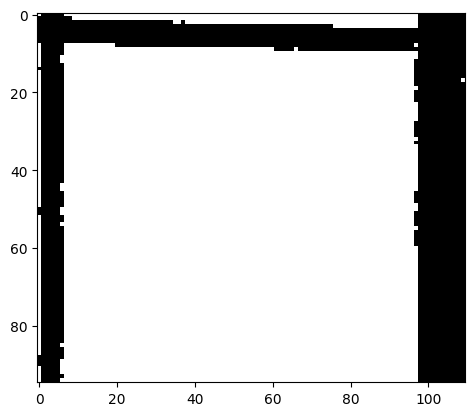

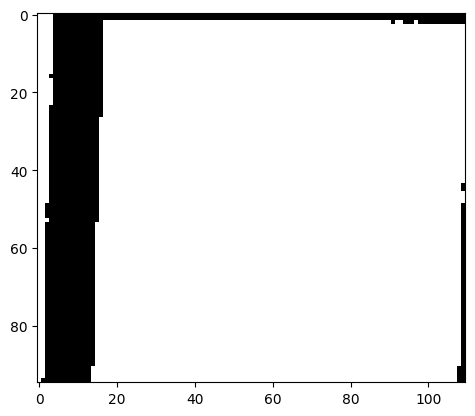

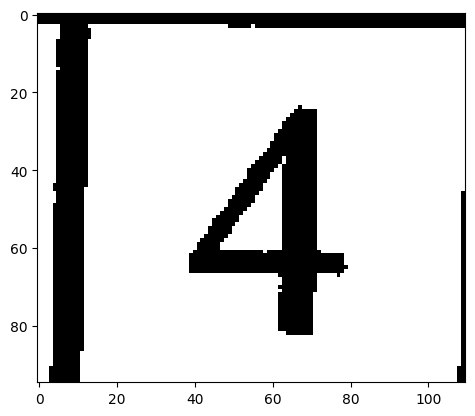

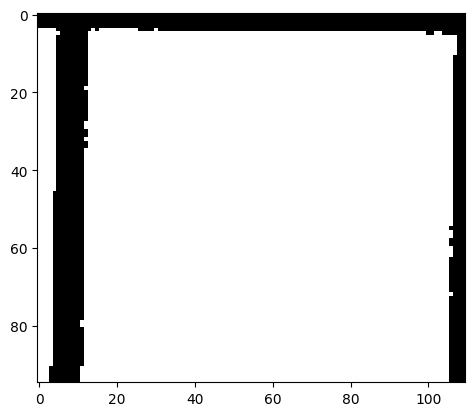

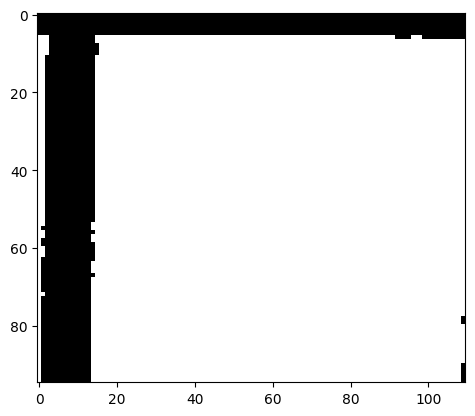

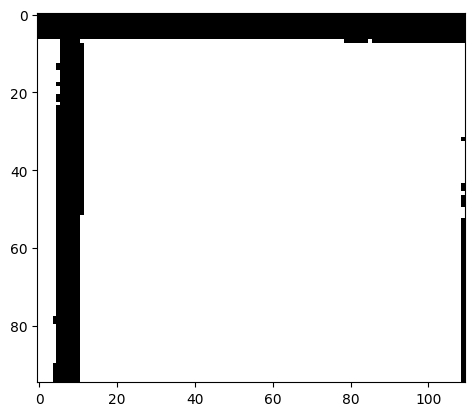

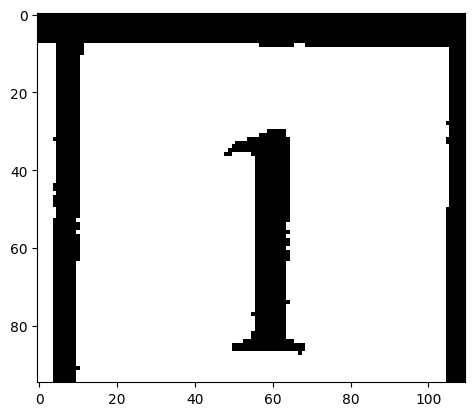

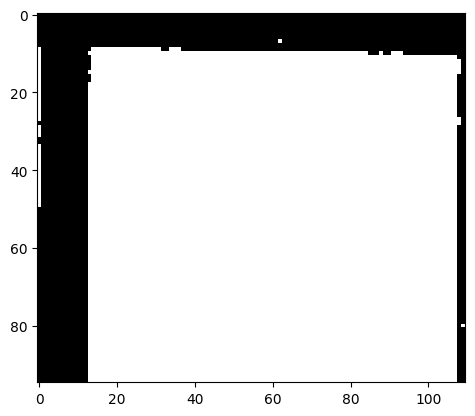

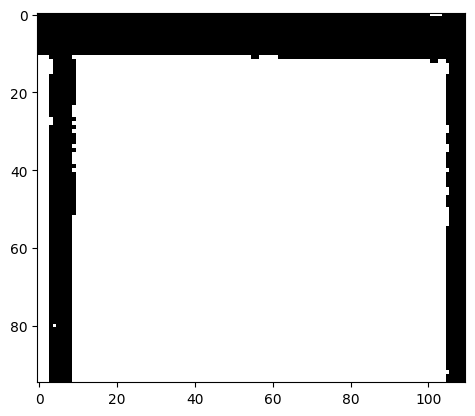

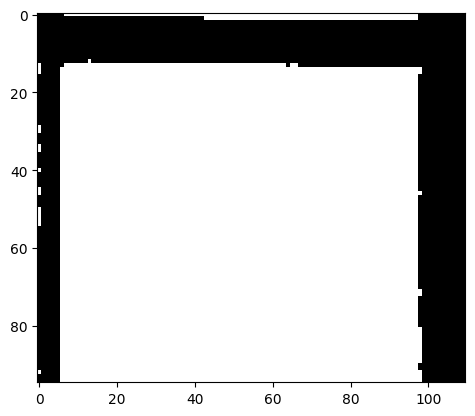

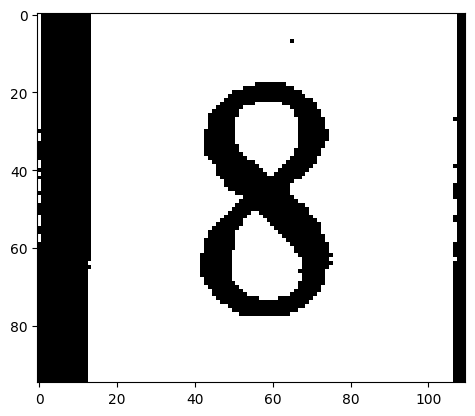

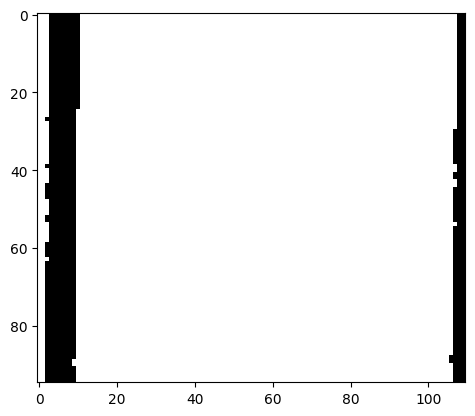

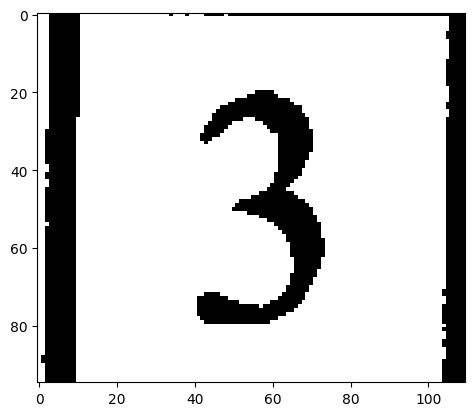

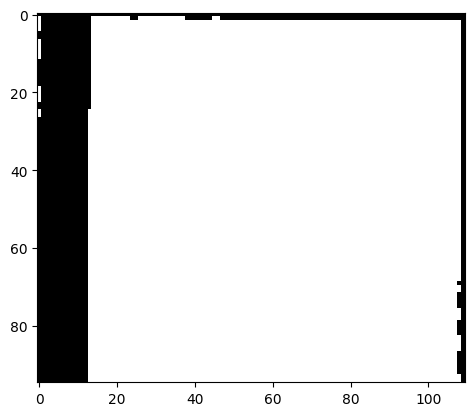

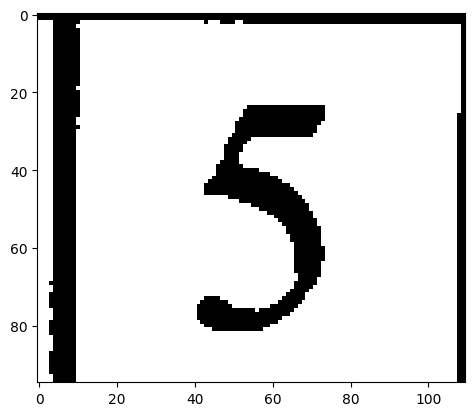

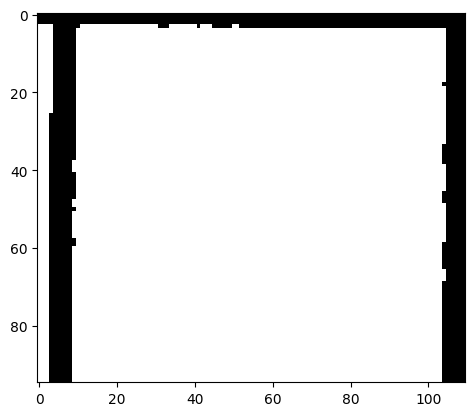

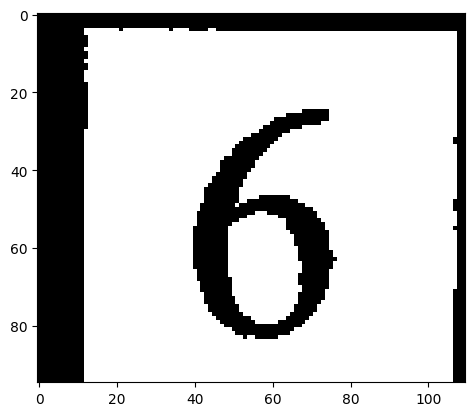

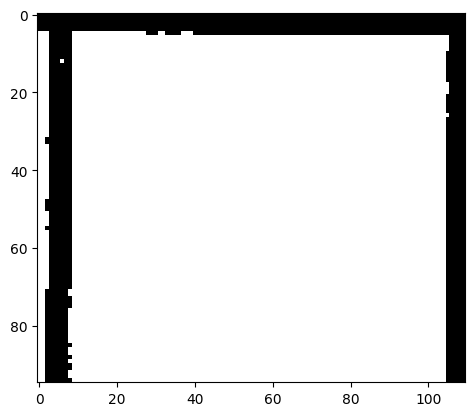

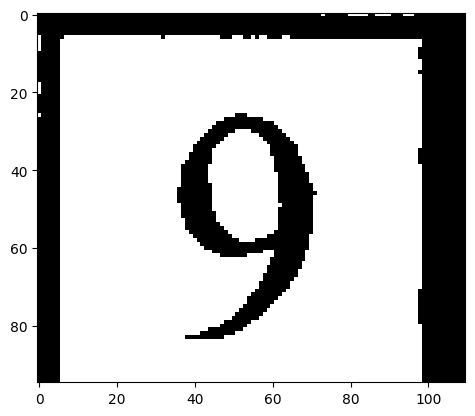

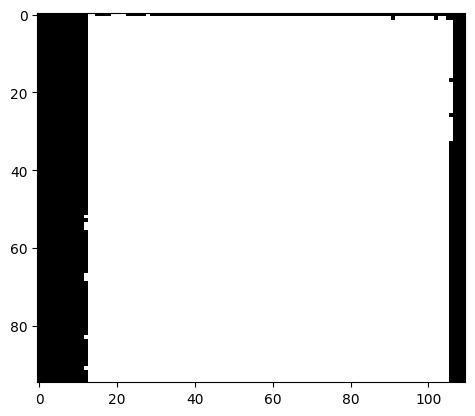

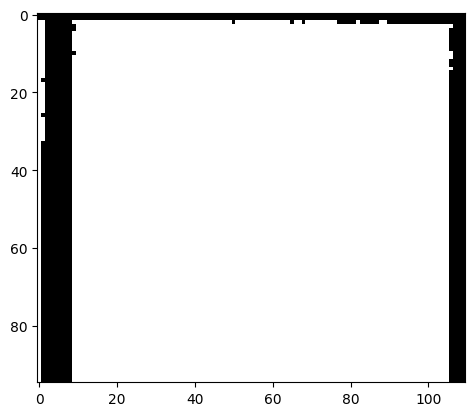

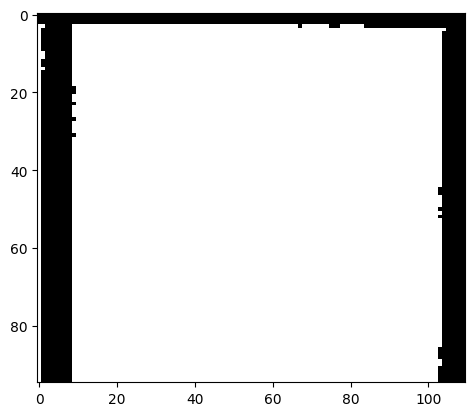

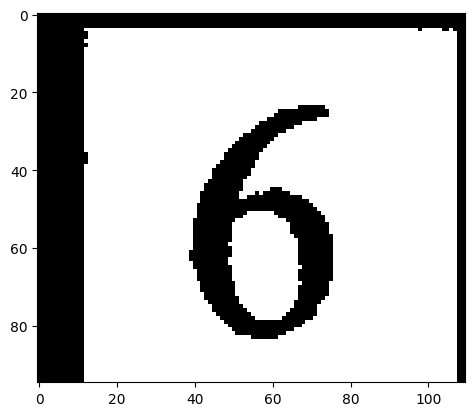

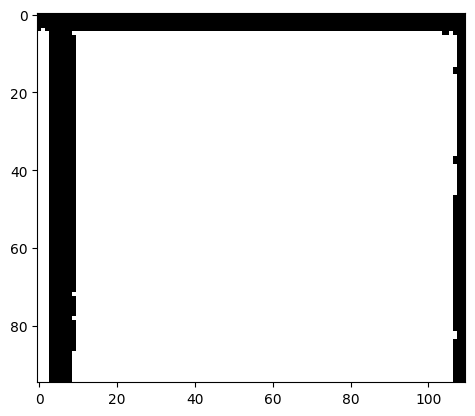

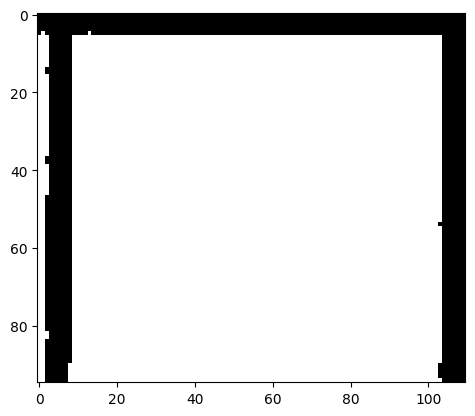

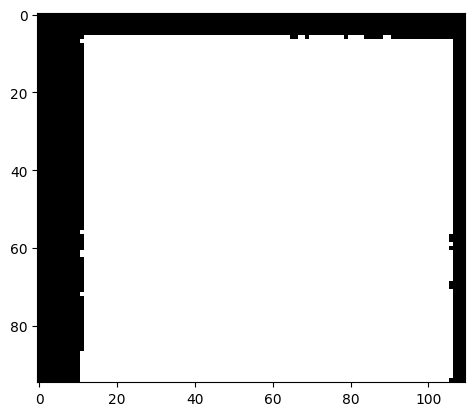

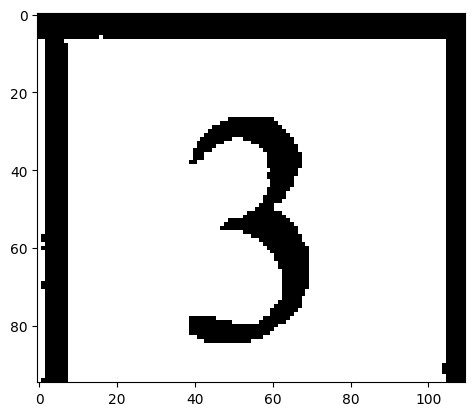

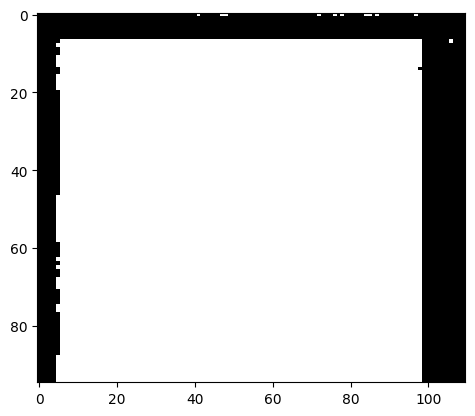

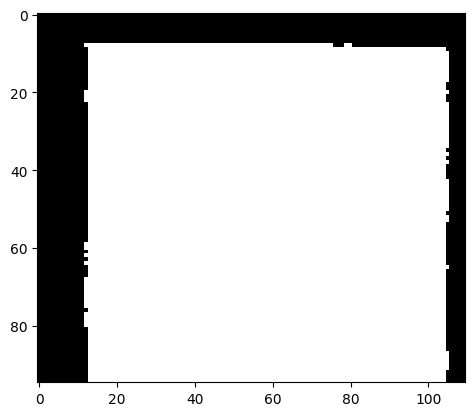

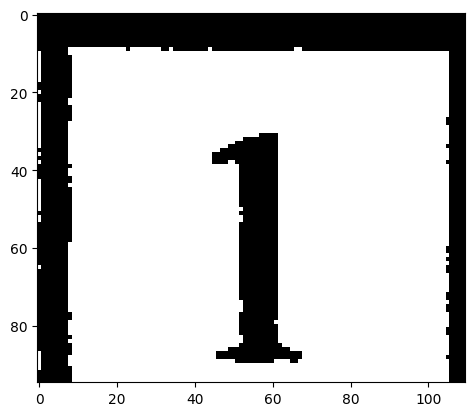

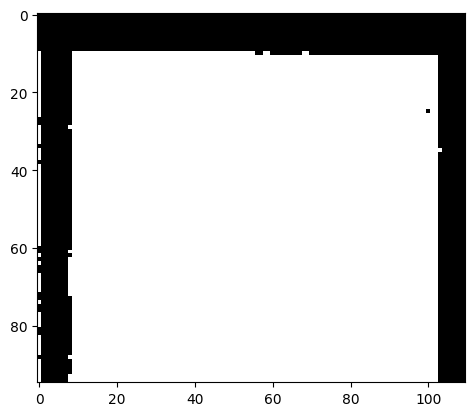

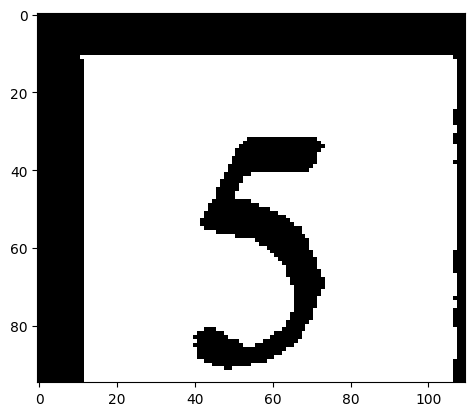

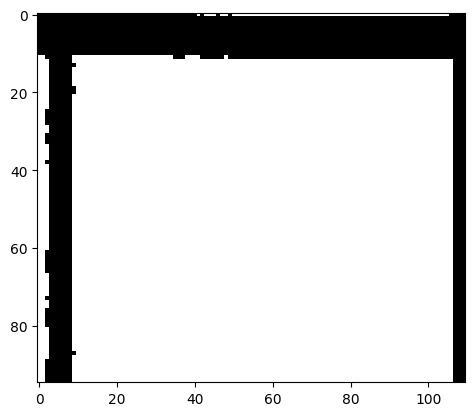

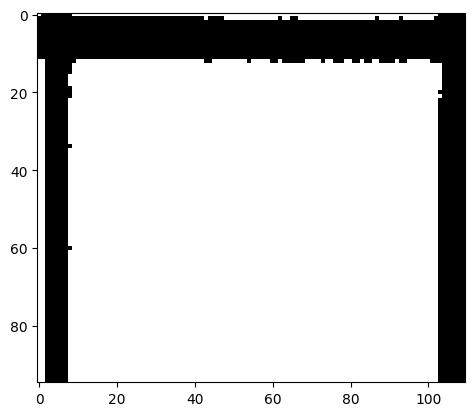

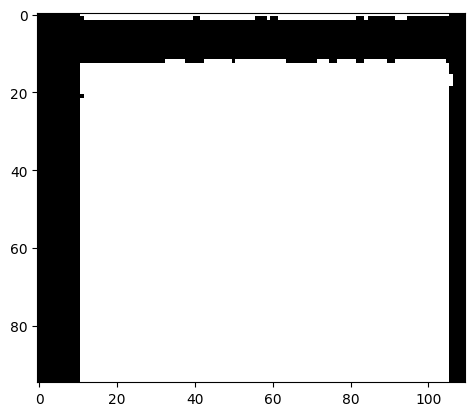

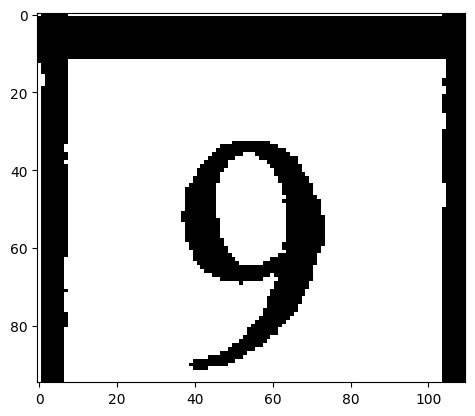

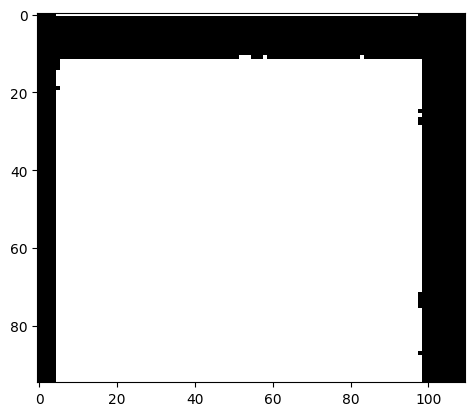

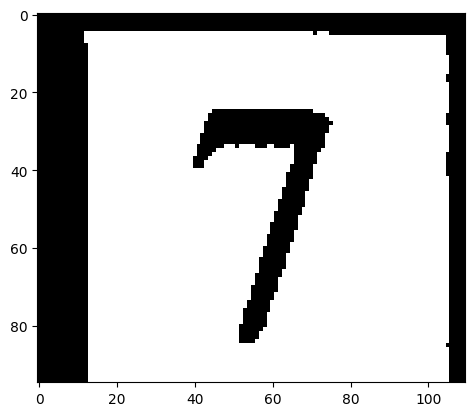

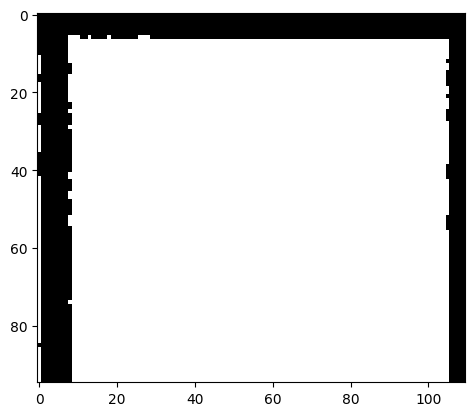

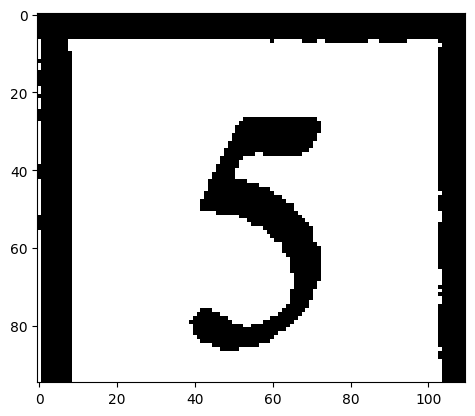

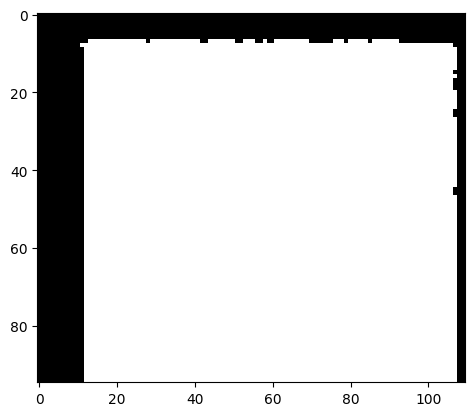

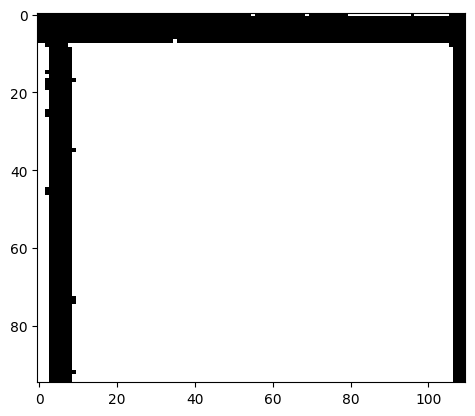

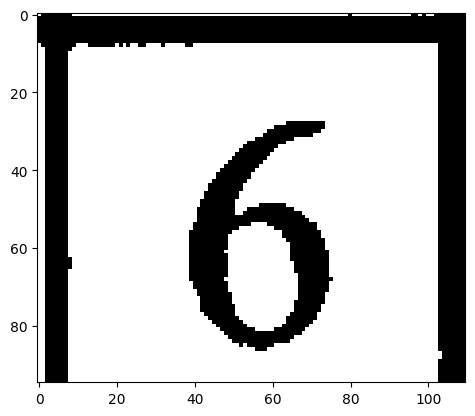

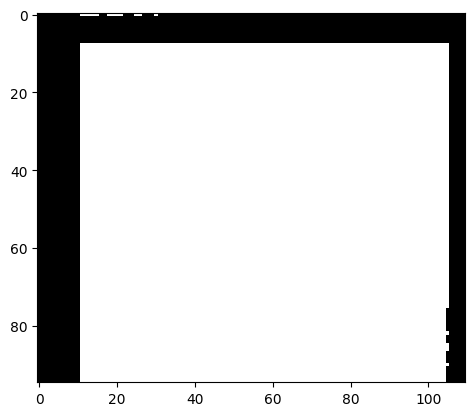

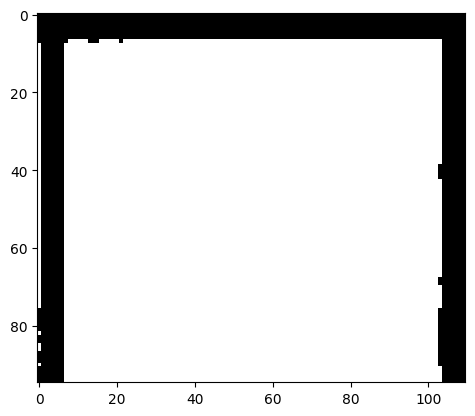

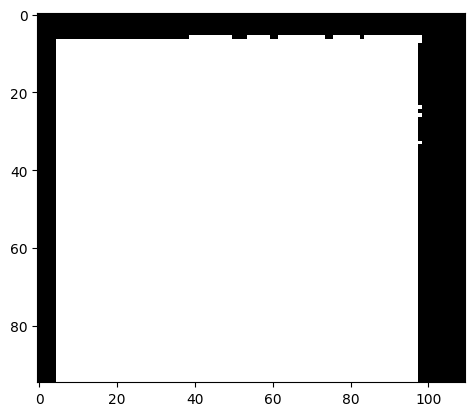

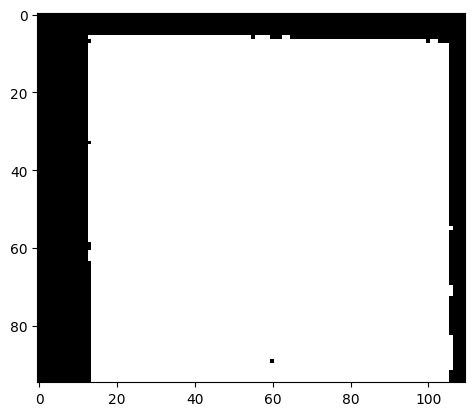

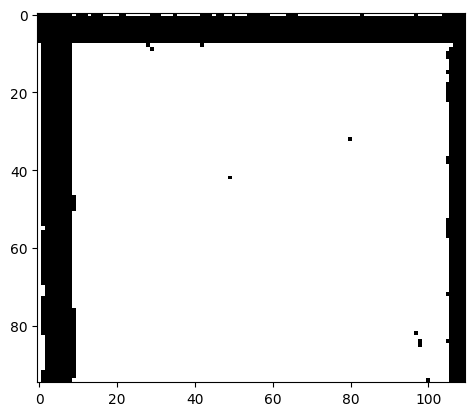

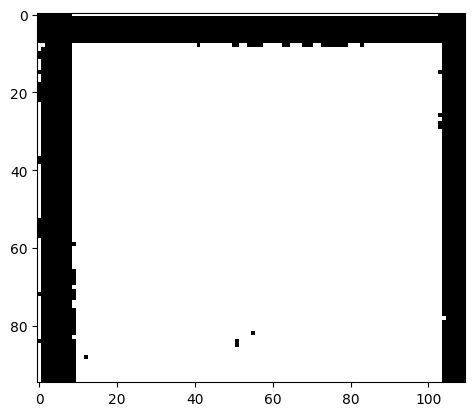

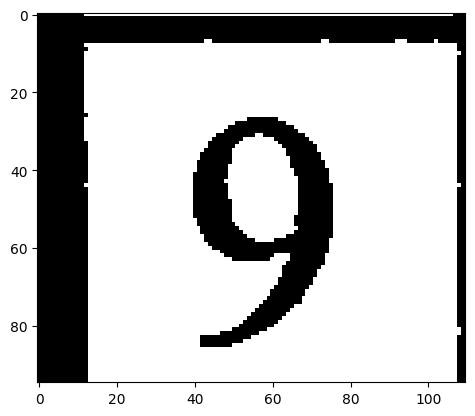

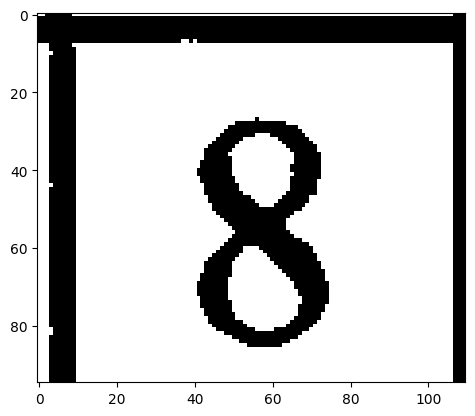

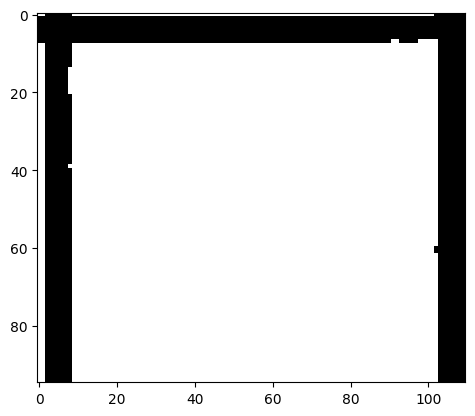

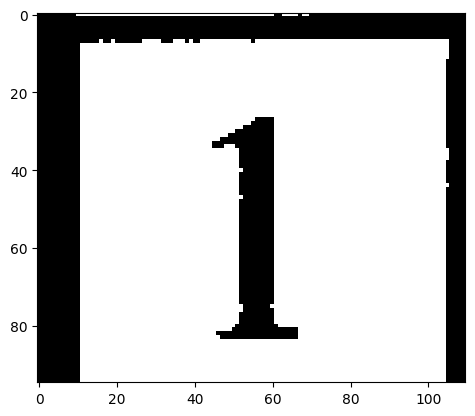

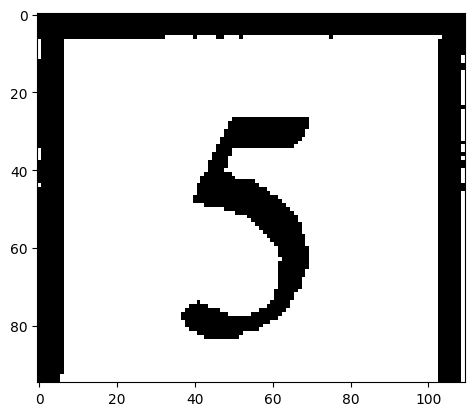

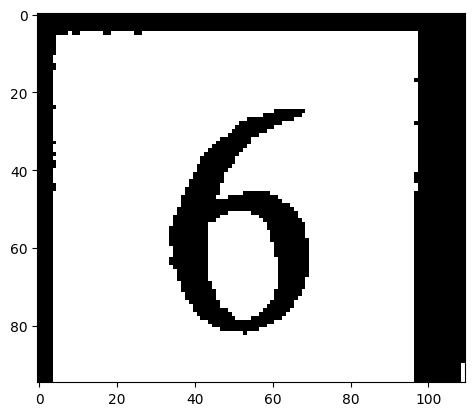

In [24]:
lis_All_img = []
for x in img_lisRow:
  _, dy = x.shape
  lis = []
  for i in range(0, dy-20, 105):
    NewImg = x[10:, i:i+110]
    showImage(NewImg)
    lis.append(NewImg)
  print()
  lis_All_img.append(lis)


#Used Model

In [88]:
def foundNumber(image):
  New_img = image[15:, 10:115]

  image = cv2.resize(New_img, (30, 30))

  image = np.expand_dims(image, axis=2)
  image = np.expand_dims(image, axis=0)
  image = 255 - image
  image = image.astype(float) / 255
  p = model.predict(image)

  max = p.max()
  index = -1
  if max < 0.8:
    index = 0

  else:
    for x in p:
      i = 0
      for y in x:
        if (y == max):
          index  = i
        i = i + 1
  return index

In [128]:
lis = []
for imgs in lis_All_img:
  arr = []
  for img in imgs:
    x = foundNumber(img)
    arr.append(x)
  lis.append(arr)


1/1 [==============================] - 0s 17ms/step


In [129]:
lis_cp = np.zeros((9,9))
for i in range(0,9):
  for j in range(0,9):
    lis_cp[i][j] = int(lis[i][j])

print(lis_cp)

[[4. 3. 7. 0. 0. 8. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 8. 0. 7.]
 [0. 8. 0. 0. 0. 5. 0. 6. 0.]
 [0. 4. 0. 0. 0. 1. 0. 0. 0.]
 [8. 0. 3. 0. 5. 0. 6. 0. 9.]
 [0. 0. 0. 6. 0. 0. 0. 3. 0.]
 [0. 1. 0. 5. 0. 0. 0. 9. 0.]
 [7. 0. 5. 0. 0. 6. 0. 0. 0.]
 [0. 0. 0. 9. 8. 0. 1. 5. 6.]]


#Solve Sudoku


In [117]:
def is_safe(grid, y, x, num):
    for i in range(0, 9):
        if grid[y][i] == num:
            return False
    for i in range(0, 9):
        if grid[i][x] == num:
            return False
    x0 = (x//3)*3
    y0 = (y//3)*3

    for i in range(0,3) :
        for j in range(0,3):
            if grid[y0+i][x0+j] == num:
                return False
    return True

def find_empty_location(grid):
    for i in range(9):
        for j in range(9):
            if grid[i][j] == 0:
                return i, j
    return None

def solve_sudoku(grid):
    empty_loc = find_empty_location(grid)
    if not empty_loc:
        return True

    row, col = empty_loc
    for num in range(1, 10):
        if is_safe(grid, row, col, num):
            grid[row][col] = num
            if solve_sudoku(grid):
                return True
            grid[row][col] = 0
    return False

#Write result Sudoku in Iamge

In [124]:
def Write_to_Sudoku(grid, lis_cp, image):
  img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  dx, dy = img.shape

  font = cv2.FONT_HERSHEY_SIMPLEX
  fontScale = 3
  color = (255, 0, 0)
  thickness = 8

  index_X = 0
  for i in range(50, dx, 105):
    index_Y = 0
    for j in range(0, dy, 100):
      txt = ""

      if (index_Y < 9 and index_X < 9) and lis_cp[index_X][index_Y] == 0:
        txt = str(grid[index_X][index_Y])

      y = int((i + (i+110))/2)
      x = int((j+(j+100))/2)
      org = (x, y)
      image = cv2.putText(image, txt, org, font, fontScale, color, thickness, cv2.LINE_AA)
      index_Y = index_Y + 1
    index_X = index_X + 1

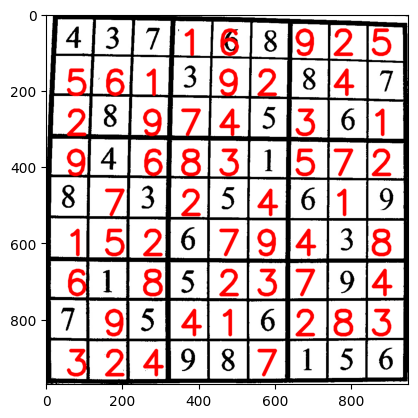

In [125]:
solve_sudoku(lis)
image_cop = cv2.imread('/content/Cropped Image.jpg')
Write_to_Sudoku(lis, lis_cp, image_cop)
showImage(image_cop)

#Save Image Result

In [126]:
cv2.imwrite("ReImage.jpg", image_cop)

True